In [11]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from IPython.display import HTML, display
from sklearn.svm import SVR
import math
import tabulate

%matplotlib inline

In [2]:
raw_data = pd.read_csv('../data/nutrition/epi_r.csv')

In [3]:
sqrt = math.ceil(math.sqrt(len(list(raw_data.columns))))
l = np.resize(list(raw_data.columns),(sqrt*sqrt)).reshape(sqrt,sqrt)
# display(HTML(tabulate.tabulate(l, tablefmt='html')))
# pd.set_option('max_colwidth', 8)
# display(pd.DataFrame(data=l))
# pd.set_option('max_colwidth', 60)

print(raw_data.columns[0:20])

Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium', '#cakeweek',
       '#wasteless', '22-minute meals', '3-ingredient recipes',
       '30 days of groceries', 'advance prep required', 'alabama', 'alaska',
       'alcoholic', 'almond', 'amaretto', 'anchovy', 'anise', 'anniversary'],
      dtype='object')


In [ ]:
raw_data.yogrut.unique()

In [5]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

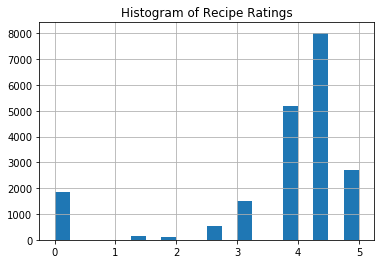

In [6]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [7]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [15]:
# feature data for models
features = raw_data.copy()
features.head()
features = features.sample(frac=1.0)

In [32]:
svr = SVR()
X = features.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.rating.apply(lambda val: 0 if val < 4 else 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20052 entries, 864 to 16106
Columns: 674 entries, #cakeweek to turkey
dtypes: float64(674)
memory usage: 103.3 MB


In [33]:
for col in X:
    if X[col].sum() <= 100:
        del X[col]

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20052 entries, 864 to 16106
Columns: 299 entries, advance prep required to turkey
dtypes: float64(299)
memory usage: 45.9 MB


In [35]:
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

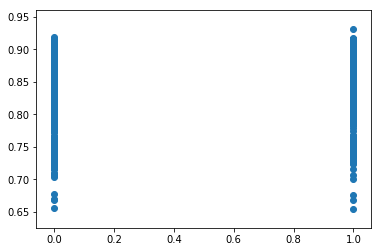

In [36]:
plt.scatter(Y, svr.predict(X))

In [37]:
svr.score(X, Y)

-0.4793085177347589

In [38]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

KeyboardInterrupt: 

In [ ]:
Y.unique()